# Neural Networks

In deze opdracht ga je een simpele Perceptron trainen om kleine logische problemen op te lossen. Vervolgens schakel je over naar een Multi-Layer Perceptron en vergelijk je de resultaten. Tenslotte zet je de MLP in om de afbeeldingen uit de digits dataset te herkennen. Wederom is een cross validated grid search nodig om de juiste hyperparameters te vinden.

In [1]:
# misc data processing imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# dataset
from sklearn.datasets import load_digits

# classifier & testing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

# do not show non-converged warnings
# during mlp grid search
import warnings
warnings.filterwarnings('ignore')

## 1. Perceptron

Hieronder wordt een dataset `X_pairs` en een perceptron gedefinieerd. De dataset bestaat uit vier samples, met twee features per sample.  
In de hieropvolgende oefeneningen ga je de perceptron herhaaldelijk trainen op de dataset, maar met wisselende targets.

In [12]:
X_pairs = [[1,1], [0,1], [1,0],[0,0]]

perceptron = MLPClassifier(hidden_layer_sizes=(), 
                           learning_rate_init=0.1, 
                           solver='sgd', 
                           activation='logistic',
                           tol=0.001)

### 1.1 AND probleem

Bij het AND probleem leer je de perceptron om de output `1` te genereren wanneer **beide features** van de input sample `1` zijn. Als één of beide features van de sample `0` zijn, dan moet de perceptron een `0` genereren.

In [13]:
y_and = [1, 0, 0, 0]

  * Train de perceptron op `X_pairs` met `y_and` als target.

In [14]:
perceptron.fit(X_pairs, y_and);

  * Plot de error gedurende de perceptron's training (`perceptron.loss_curve_`). Tot hoe ver daalt de error?

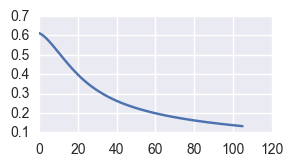

In [15]:
plt.figure(figsize=(3,1.5))
plt.plot(perceptron.loss_curve_);

  * Bekijk of de perceptron het AND probleem heeft geleerd door `X_pairs` aan te bieden in de predict stap.  
  Is de uitkomst gelijk aan `y_and` (1, 0, 0, 0)?

In [16]:
perceptron.predict(X_pairs)

array([1, 0, 0, 0])

  * Haal de gewichten en de bias van de perceptron op.
  * Reken zelf de output na aan de hand van de input `X_pairs`, de gewichten en de bias

In [19]:
np.array((np.sum((np.array(X_pairs).T * perceptron.coefs_[0]), axis=0) + perceptron.intercepts_[0]) >= 0,
         dtype=int)

array([1, 0, 0, 0])

### OR probleem

Bij het OR probleem leer je de perceptron om de output `1` te genereren wanneer **minstens één feature** van de input sample `1` is. Als beide features van de sample `0` zijn, dan moet de perceptron een `0` genereren.

In [27]:
y_or  = [1, 1, 1, 0]

  * Train de perceptron op `X_pairs` met `y_or` als target.

In [28]:
perceptron.fit(X_pairs, y_or);

  * Plot de error gedurende de perceptron's training. Tot hoe ver daalt de error?

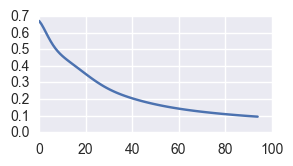

In [29]:
plt.figure(figsize=(3,1.5))
plt.plot(perceptron.loss_curve_);

  * Bekijk of de perceptron het OR probleem heeft geleerd door `X_pairs` aan te bieden in de predict stap.  
  Is de uitkomst gelijk aan `y_or` (1, 1, 1, 0)?

In [30]:
perceptron.predict(X_pairs)

array([1, 1, 1, 0])

### XOR probleem

Bij het XOR probleem leer je de perceptron om de output `1` te genereren wanneer **slechts één feature** van de input sample `1` is. Als beide features `0` zijn of beide features `1` zijn, dan moet de perceptron een `0` genereren.

In [31]:
y_xor = [0, 1, 1, 0]

  * Train de perceptron op `X_pairs` met `y_xor` als target.

In [34]:
perceptron.fit(X_pairs, y_xor);

  * Plot de error gedurende de perceptron's training. Tot hoe ver daalt de error?

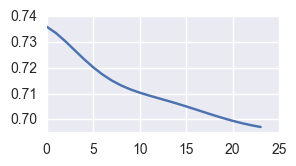

In [35]:
plt.figure(figsize=(3,1.5))
plt.plot(perceptron.loss_curve_);

  * Bekijk of de perceptron het XOR probleem heeft geleerd door `X_pairs` aan te bieden in de predict stap.  
  Is de uitkomst gelijk aan `y_xor` (0, 1, 1, 0)?

In [15]:
perceptron.predict(X_pairs)

array([0, 1, 0, 0])

## 2. Multi-Layer Perceptron: XOR probleem

Hieronder wordt een Multi-Layer Perceptron gedefinieerd met twee hidden units.

In [36]:
mlp = MLPClassifier(hidden_layer_sizes=(2,),
                    max_iter=2000,
                    learning_rate_init=0.8,
                    solver='sgd', 
                    activation='logistic',
                    momentum=0,
#                     random_state=0,
                    tol=0.00000001)

  * Train de MLP op `X_pairs` met `y_xor` als target.

In [37]:
mlp.fit(X_pairs, y_xor);

  * Plot de error gedurende de MLP's training.

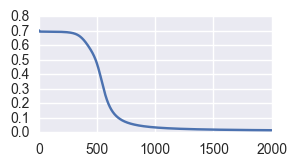

In [38]:
plt.figure(figsize=(3,1.5))
plt.plot(mlp.loss_curve_);

  * Bekijk of de MLP het XOR probleem heeft geleerd door `X_pairs` aan te bieden in de predict stap.  
  Is de uitkomst gelijk aan `Y_xor` (0, 1, 1, 0)? En wat als je de MLP meerdere keren opnieuw definieert en traint?

In [39]:
mlp.predict(X_pairs)

array([0, 1, 1, 0])

## 3. Multi-Layer Perceptron: Digits

Je gaat nu een MLP trainen op digits dataset die ook tijdens de Nearest Centroid en SVM practica gebruikt is.

### 3.1 Data laden

* Laad de dataset.
* Schaal de features tussen 0 en 1.
* Verdeel de data in een train set (80%) en test set (20%).

In [41]:
data = load_digits()

X = data.data / np.max(data.data)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 3.2 MLP trainen

Hieronder is een MLP gedefinieerd. Enkele parameters zijn al ingesteld. 

In [43]:
mlp = MLPClassifier(solver='sgd', 
                    activation='logistic',
                    momentum=0.2,
                    tol=0.00001)

  * Voer een 5-fold cross validated grid search uit om de optimale waarden te vinden voor het aantal hidden units en de learning rate

In [44]:
hiddenunits_params = [(1),(3),(10),(20),(30), (50), (100)]
learningrate_params = [0.01, 0.05, 0.1, 0.5, 1.0]
parameters = {'hidden_layer_sizes':hiddenunits_params, 'learning_rate_init':learningrate_params}

clf = GridSearchCV(mlp, parameters, cv=3).fit(X_train, y_train)

  * Plot de gemiddelde test scores per parameter setting in een heatmap.

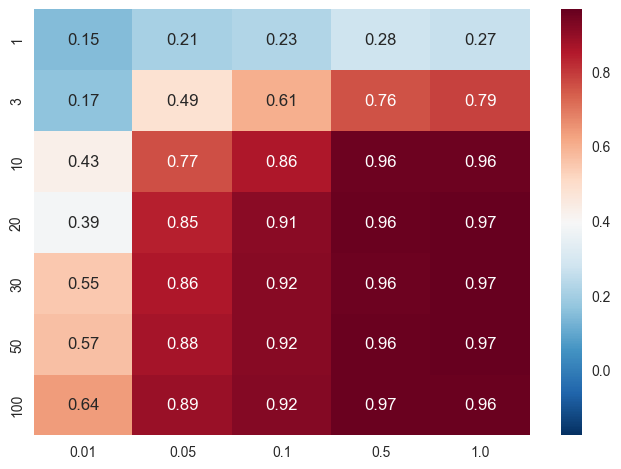

In [45]:
scores = clf.cv_results_['mean_test_score'].reshape(len(hiddenunits_params), len(learningrate_params))
sns.heatmap(scores, center=0.4, yticklabels=hiddenunits_params, xticklabels=learningrate_params, annot=True);

  * Print de beste parameter settings en de bijbehorende score.

In [24]:
clf.best_params_, clf.best_score_

({'hidden_layer_sizes': 30, 'learning_rate_init': 1.0}, 0.96868475991649272)

  * Plot de error tijdens de training van de MLP met de beste parameter settings

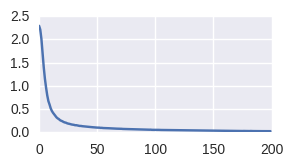

In [25]:
plt.figure(figsize=(3,1.5))
plt.plot(clf.best_estimator_.loss_curve_);

### 3.3 MLP testen

  * Classificeer de test data aan de hand van de best scorende MLP-parameter settings.

In [26]:
y_pred = clf.predict(X_test)

  * Bereken per digit de error tussen de voorspelde waarden en de targets door middel van (1 - F1 score)

In [27]:
errors = 1 - f1_score(y_test, y_pred, average=None)
errors

array([ 0.        ,  0.05555556,  0.01369863,  0.        ,  0.03225806,
        0.025     ,  0.01149425,  0.02631579,  0.05263158,  0.02439024])

  * Plot de errors per target in een histogram plot.
  * Vergelijk het historgram met de scores van de nearest-centroid en SVM methodes. Welke digits worden over het algemeen het beste voorspeld? En welke het minst goed?

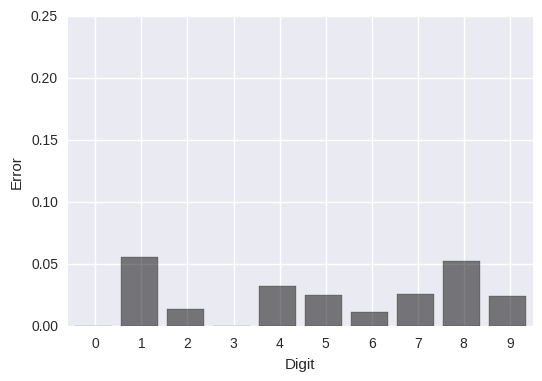

In [28]:
plt.figure(figsize=(6,4))

# plot f1 scores as bars
positions = np.arange(10)-0.45
plt.bar(positions, errors, color='k', alpha=0.5)

# limit range of axes
axes = plt.gca()
axes.set_xlim([-0.6, 9.5])
axes.set_ylim([0, 0.25])

# label each digit on x-axis
plt.xticks(np.arange(0, 10, 1.0))

# set axes labels
plt.xlabel('Digit')
plt.ylabel('Error')

# show plot
plt.show()